<a href="https://colab.research.google.com/github/inessa3/DMML2020_Tesla/blob/main/EDA_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Data Mining
_Real or Not? NLP with Disaster Tweets_  


###Explanation
##### This is our first code where we download data and describe it. To do so, we will also use some visualizations.

##### By advancing further in our project, we will make cleaning on the data and use different techniques to make predictions. Those stepns will be presented in different notebooks.

###  Plan
To start with, we are going to download the datasets and describe it.

Afterwards, we are going to do some visualizations to illustate better the information in the datasets we have.

The visualisations:
* Top 10 keywords
* Top 10 keywords (wordcloud)
* Top 10 locations
* Fake VS Real news
* Top 15 words for fake news
* Top 15 words for real news


##1.Downloading data

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
import seaborn as sns
sns.set_style("white")

####We would like to define the "Color" class in order to highlight some important responses we could achieve.

In [ ]:
# Define a color class to highlight answers
class color:
    YELLOW = '\033[93m'
    BLUE = '\033[94m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    END = '\033[0m'

###Training Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/inessa3/DMML2020_Tesla/main/data/training_data.csv")
df.head()

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1


In [ ]:
print('There are', 
      color.BOLD + color.RED + str(len(df))+' rows' + color.END, 
      'and',
      color.BOLD + color.BLUE + str(len(df.columns))+' columns' + color.END+ '.')

There are 6471 rows and 5 columns.


In [ ]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

####The base rate
#####We should aim to build a classifier which will help us to get a higher score than a base rate.


In [ ]:
df["target"].value_counts()

0    3701
1    2770
Name: target, dtype: int64

In [ ]:
print ('The base rate is equal to ' + color.BOLD + color.RED + str(round(df.target.value_counts()[0] / len(df), 4))+ color.END)

The base rate is equal to 0.5719


###Test Data

In [ ]:
df_test_data = pd.read_csv("https://raw.githubusercontent.com/inessa3/DMML2020_Tesla/main/data/test_data.csv")
df_test_data.head()

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball


In [ ]:
print('There are', 
      color.BOLD + color.RED + str(len(df_test_data))+' rows' + color.END, 
      'and',
      color.BOLD + color.BLUE + str(len(df_test_data.columns))+' columns' + color.END+ '.')

There are 1142 rows and 4 columns.


In [ ]:
df_test_data.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

#2.EDA

##Visualization 1
**Here, we visualize the top 10 keywords:**

In [ ]:
print("There are", 
      color.BOLD + color.RED +  str(df['keyword'].unique().shape[0]), color.END+ 
      'different keywords')

There are 222 different keywords


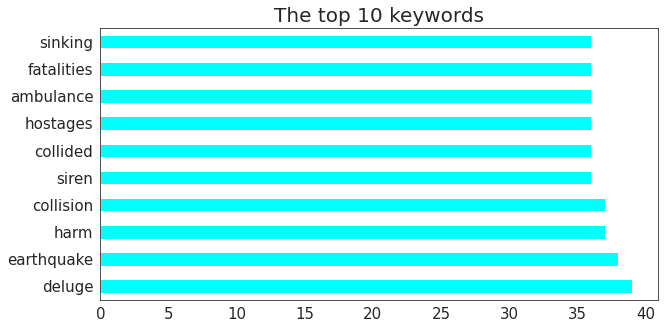

In [ ]:
eda1 = df["keyword"].value_counts()[:10].plot(kind='barh', figsize=(10,5), colormap='cool', title = 'The top 10 keywords', fontsize = 15)
eda1.title.set_size(20)

## Visualization 2
**To see better the most popular words, we would use the *wordcloud* :**

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
keywords=pd.DataFrame()
keywords = df["keyword"].value_counts()[:10]
keywords 

deluge        39
earthquake    38
harm          37
collision     37
sinking       36
collided      36
ambulance     36
hostages      36
fatalities    36
siren         36
Name: keyword, dtype: int64

In [ ]:
#Create and generate a word cloud image:
eda2 = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(str(keywords))

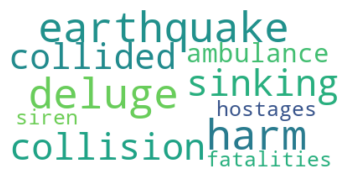

In [ ]:
# Display the generated image:
plt.imshow(eda2, interpolation='bilinear')
plt.axis("off")
plt.show()

##Visualization 3
**We visualize the top 10 locations. Yet, we notice that there is a mix of cities and countries:**

In [ ]:
df.isnull().sum()

id             0
keyword       55
location    2141
text           0
target         0
dtype: int64

In [ ]:
df.copy
df["location"]=df["location"].fillna(0)

In [ ]:
print("There are", 
      color.BOLD + color.RED +  str(df['location'].unique().shape[0]), color.END+ 
      'different locations')

There are 2922 different locations


In [ ]:
df["location"].value_counts()[:10]

0                  2141
USA                  91
New York             59
United States        46
London               39
Canada               25
UK                   24
Los Angeles, CA      23
Nigeria              22
India                21
Name: location, dtype: int64

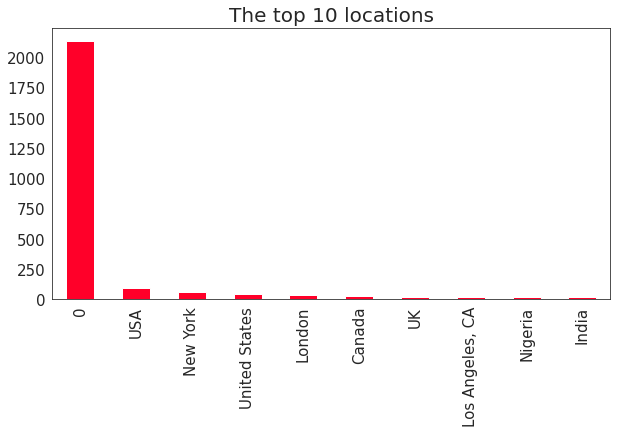

In [ ]:
eda3 = df["location"].value_counts()[:10].plot(kind='bar', figsize=(10,5), colormap='gist_rainbow', title = 'The top 10 locations', fontsize = 15)
eda3.title.set_size(20)

##Visualization 4
**With this pie chart we can see the distribution of fake and real news:**

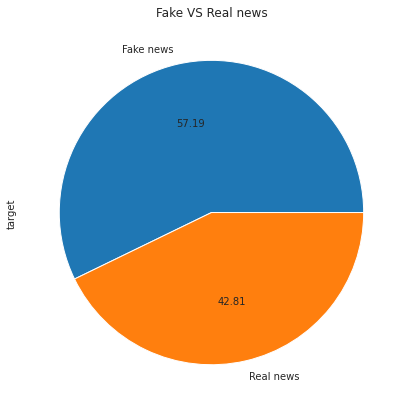

In [ ]:
eda4=df["target"].value_counts()
eda4.plot.pie(labels=['Fake news', 'Real news'], autopct='%.2f', title= "Fake VS Real news", fontsize=10, figsize=(7, 7))

##Visualization 5


**Here, we can see the top 15 words for fake news:**


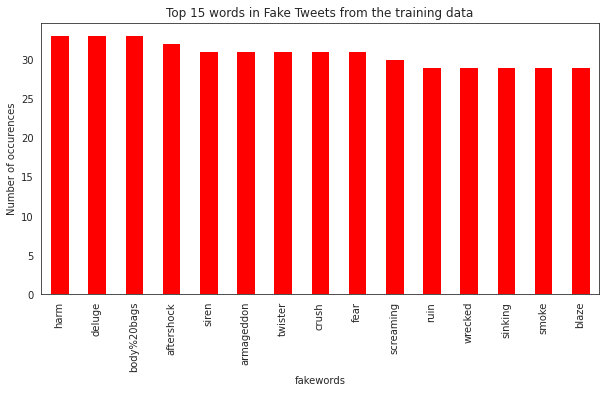

In [ ]:
df_fake_words = df['keyword'].loc[(df['target'] == 0)].value_counts()
df_fake_words_top_15 = df_fake_words[0:15]

df_fake_words_top_15.plot.bar(xlabel = 'fakewords', ylabel = 'Number of occurences', title = 'Top 15 words in Fake Tweets from the training data', legend = False, grid = False, figsize=(10, 5), color = 'RED')

## Visualization 6

**Finally, we can see the top 15 words for real news:**

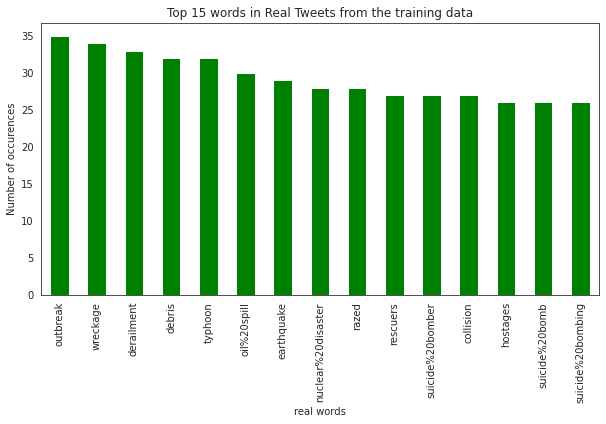

In [ ]:
df_real_words = df['keyword'].loc[(df['target'] == 1)].value_counts()
df_real_words_top_15 = df_real_words[0:15]

df_real_words_top_15.plot.bar(xlabel = 'real words', ylabel = 'Number of occurences', title = 'Top 15 words in Real Tweets from the training data', legend = False, grid = False, figsize=(10, 5), color = 'Green')